In [20]:
import sys
from pathlib import Path


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report


from spnc import spnc_anisotropy
import spnc_ml as ml





In [21]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

In [22]:
# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 590
m0 = 0.0027851472496461106
bias = True

# Reservoir parameters
h = 0.31526062658308784
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

In [23]:
# Params
params = {
    'theta':0.2936126276710164, 
    'gamma':0.1375012403026338, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  590
Deterministic mask will be used
1234
interdensity: 100
restart: True
Primep1: None
h: 0.31526062658308784
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.4688679896398555
e_21_small: 0.46886793322344605
e_12_big: 1.7299104804116068
e_21_big: 1.7299104239951972
theta_1: 18.37983798379838
theta_2: 161.63816381638162
f0: 10000000000.0
p1: 0.500000282082047
p2: 0.4999997179179529


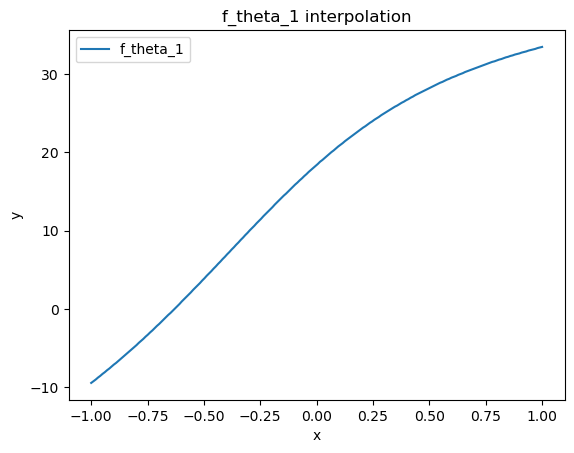

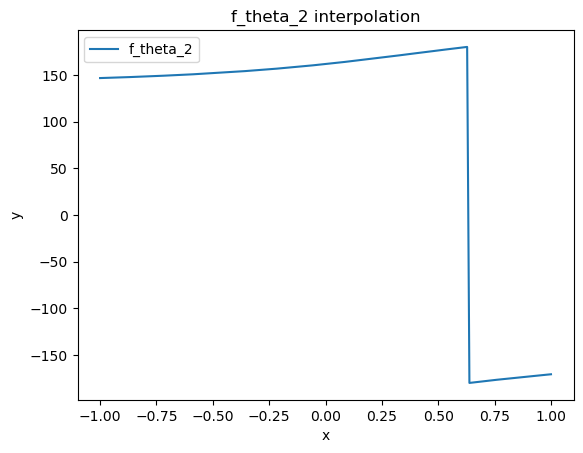

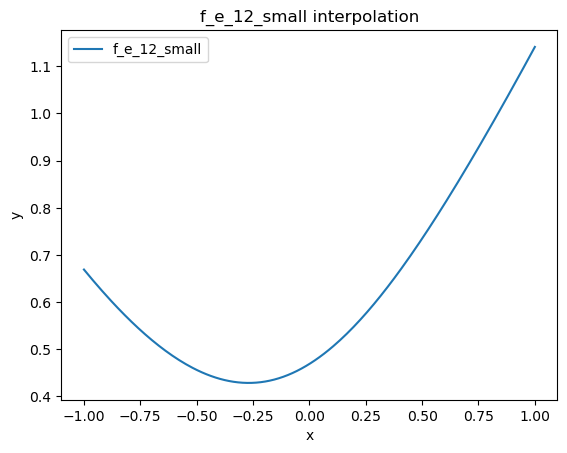

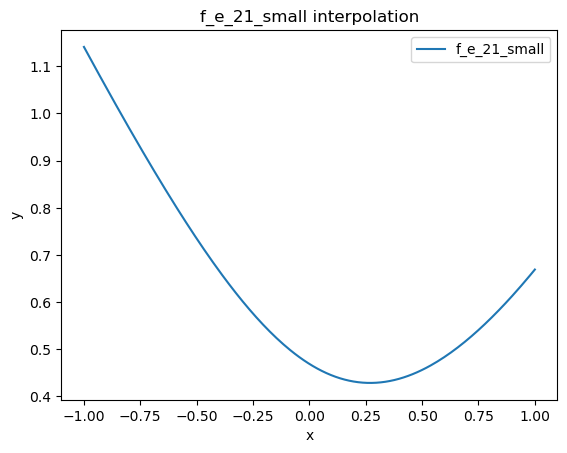

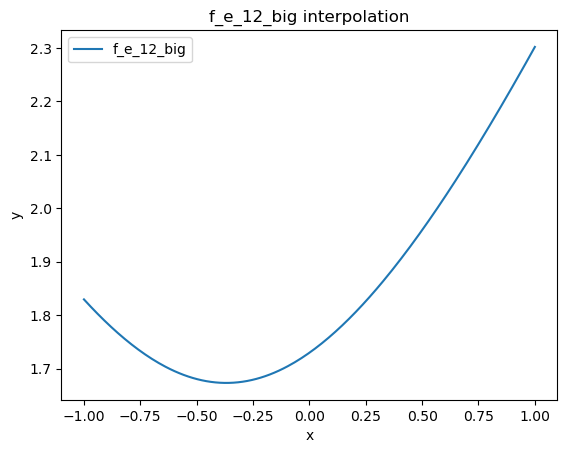

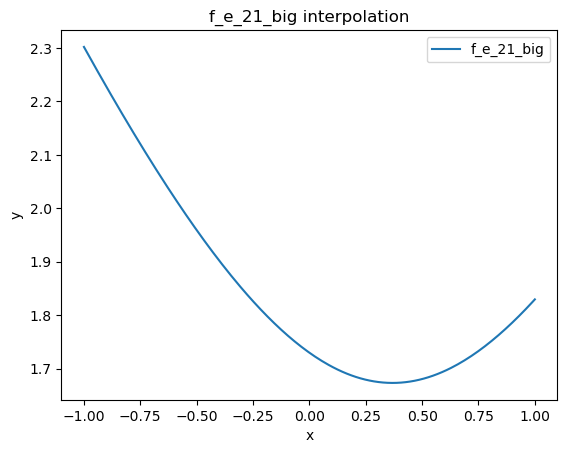

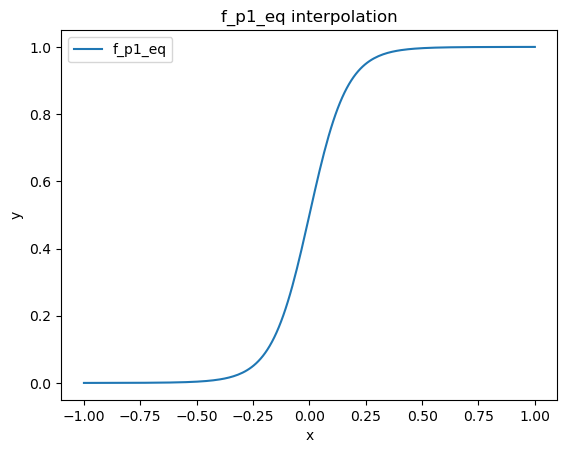

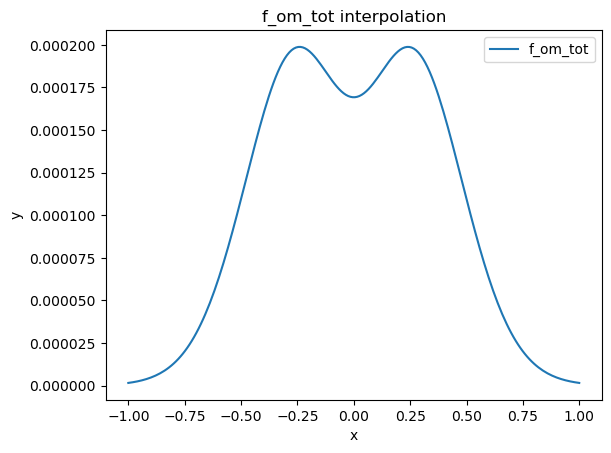

current phase: train
p1 in train & fast: 0.500000282082047
noise-free training output
restarted
Seed Training: 1234
interdensity: 100
restart: True
Primep1: None
h: 0.31526062658308784
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.4688679896398555
e_21_small: 0.46886793322344605
e_12_big: 1.7299104804116068
e_21_big: 1.7299104239951972
theta_1: 18.37983798379838
theta_2: 161.63816381638162
f0: 10000000000.0
p1: 0.500000282082047
p2: 0.4999997179179529


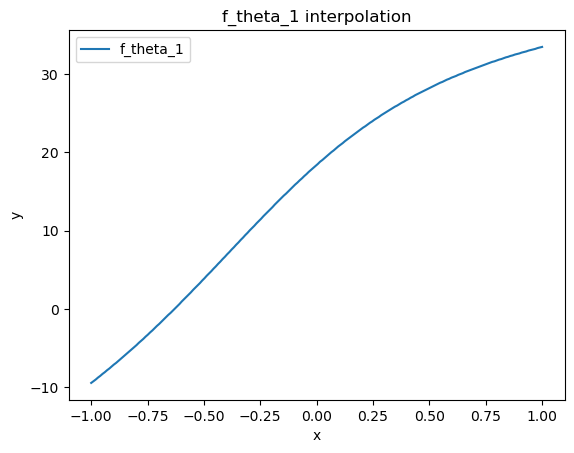

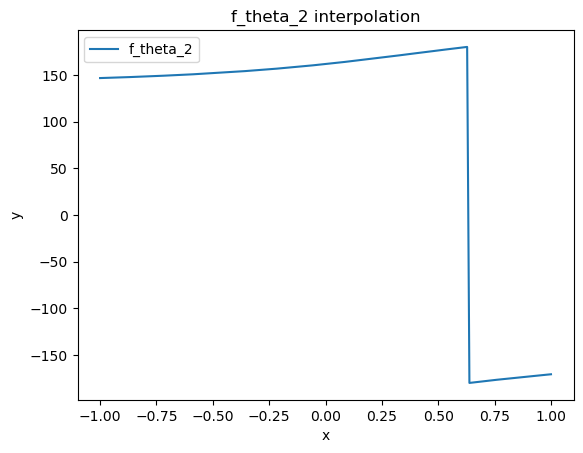

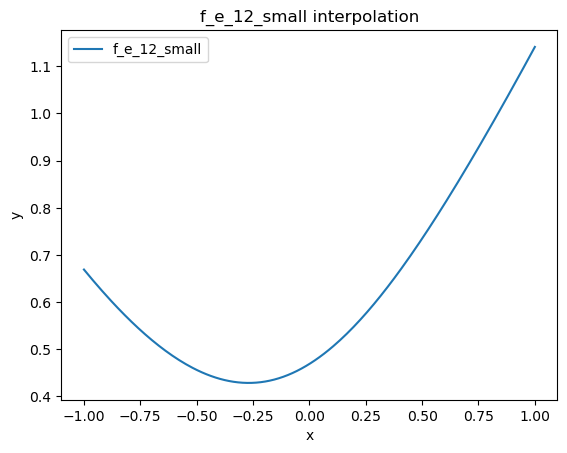

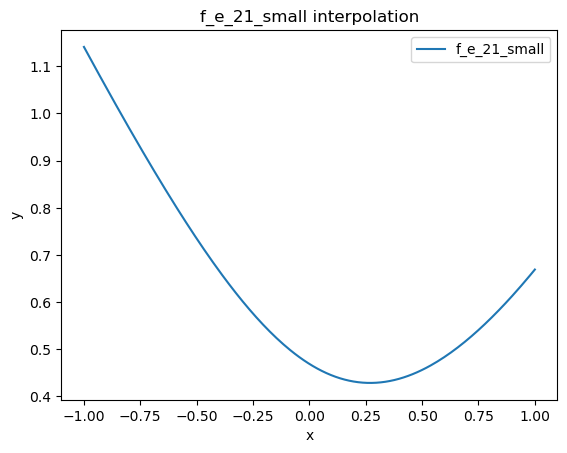

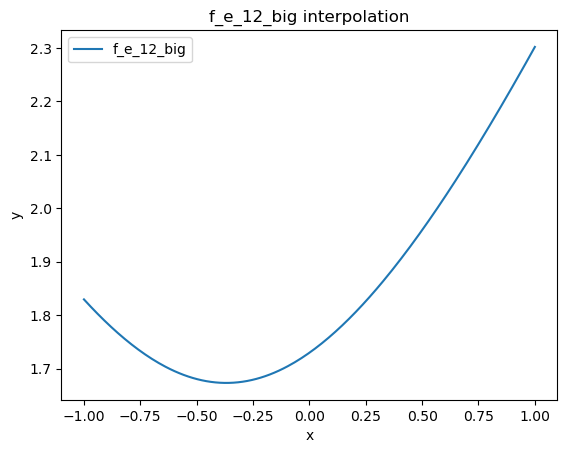

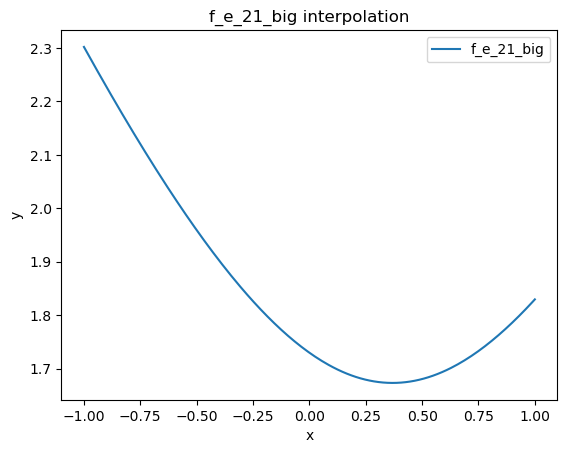

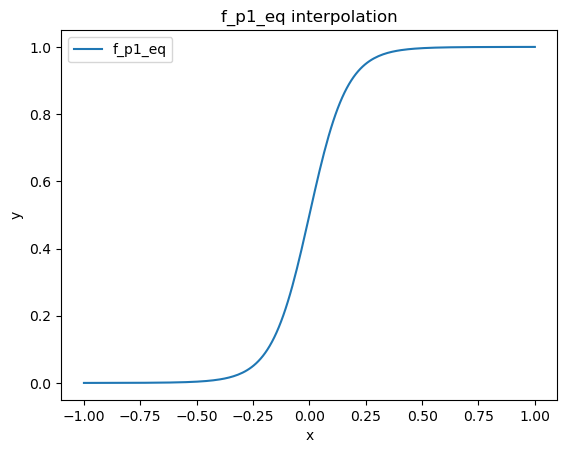

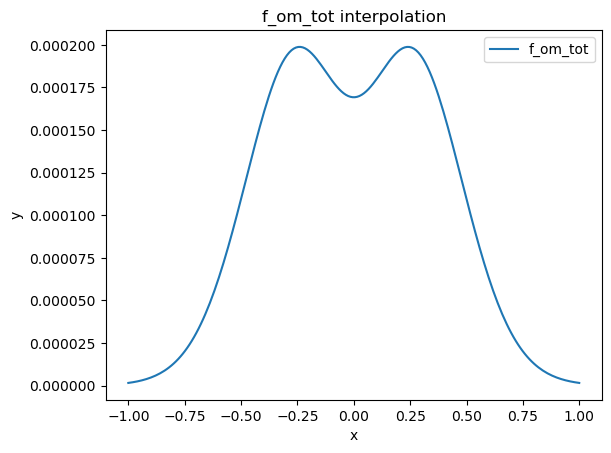

current phase: test
p1 in test & fast: 0.500000282082047
noise-free testing output
restarted
Spacer NRMSE:0
0.00255500789591997 0.45674844593658154


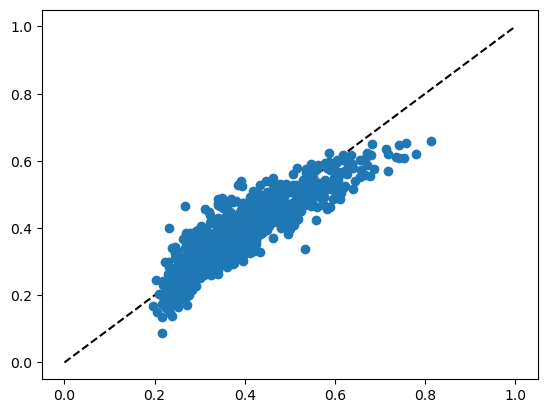

In [24]:
spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

transformf = spn.gen_signal_fast_delayed_feedback

# run

(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)